# Visualizing the stock market in different industries affected by Coronavirus 


Since this pandemic broke out,every governmeny took unprecedented steps to slow it. Thus it defenitely put a severe effect on the economy system in every country.In the section, we plan to focus on the performance of companies in the stock marktes and try to figure out on what extend different companies' operation have been affected by the Coronavirus. Manys public companies' stock price plummet while some others benefit from this special situation.

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We pick several well-known companies across key sectors in the economy, including Online shopping(Amazon),Food(Takeaway, McDonald), medical care(3M, Yiling), transportation(Ryanair, SAS) and entertainment(Tivoli, Disney, Netflix). We looked the changes of daily close price for each company from October 2019 to 14th of April 2020, and we also hightlight the lowest and highest price during this period. The different patterns for differnet industries let us easily and quickly see how differnet markets has been affacted over the last couple months.

In [2]:
Yiling=pd.read_csv("002603 Historical Data_Yiling pharmacy.csv")
Amazon=pd.read_csv("AMZN Historical Data_Amazon.csv")
Dis=pd.read_csv("DIS Historical Data_Disney.csv")
Mcd=pd.read_csv("MCD Historical Data_McDonald’s.csv")
MMM=pd.read_csv("MMM Historical Data_3M.csv")
Rya=pd.read_csv("RYA Historical Data_Ryanair.csv")
SAS=pd.read_csv("SAS Historical Data_SAS.csv")
Tiv=pd.read_csv("TIV Historical Data_Tivoli.csv")
Takeaway=pd.read_csv("TKWY Historical Data_Just eat take away.csv")
Net=pd.read_csv("NFLX Historical Data_Netflix.csv")

## Different performances in stocks markets aimd the COVID-19 outbreak

We put all files into one and we only use "Date" and "Price" for each company

In [3]:
Yiling['Date']=pd.to_datetime(Yiling['Date'])
Amazon['Date']=pd.to_datetime(Amazon['Date'])
Dis['Date']=pd.to_datetime(Dis['Date'])
Mcd['Date']=pd.to_datetime(Mcd['Date'])
MMM['Date']=pd.to_datetime(MMM['Date'])
Rya['Date']=pd.to_datetime(Rya['Date'])
SAS['Date']=pd.to_datetime(SAS['Date'])
Tiv['Date']=pd.to_datetime(Tiv['Date'])
Yiling['Date']=pd.to_datetime(Yiling['Date'])
Takeaway['Date']=pd.to_datetime(Takeaway['Date'])
Net['Date']=pd.to_datetime(Net['Date'])

In [4]:
Yiling=Yiling[Yiling['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
MMM=MMM[MMM['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Amazon=Amazon[Amazon['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Dis=Dis[Dis['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Tiv=Tiv[Tiv['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Net=Net[Net['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
SAS=SAS[SAS['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Rya=Rya[Rya['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Takeaway=Takeaway[Takeaway['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)
Mcd=Mcd[Mcd['Date']> '30-09-2019'][["Date","Price"]].reset_index(drop=True)

In [5]:
from functools import reduce
Company=reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Yiling,MMM, Amazon,Dis,Tiv,Net,SAS,Rya,Takeaway,Mcd])
Company['Date']=pd.to_datetime(Company['Date'])
Company.columns=["Date","Yiling_Medical","MMM_Medical", "Amazon_Online","Dis_Enter","Tiv_Enter","Net_Enter","SAS_Trans","Rya_Trans","Takeaway_Food","Mcd_Food"]
Company=Company.set_index("Date").sort_values(by=['Date'],ascending=True)

In [6]:
Company['Amazon_Online'] = Company['Amazon_Online'].str.replace(",","")
Company['Amazon_Online']=Company['Amazon_Online'].astype(float)

In [7]:
Company.head(2)

,Yiling_Medical,MMM_Medical,Amazon_Online,Dis_Enter,Tiv_Enter,Net_Enter,SAS_Trans,Rya_Trans,Takeaway_Food,Mcd_Food
Date,,,,,,,,,,
2019-10-01,NaN,158.38,1735.65,129.55,664.0,269.58,8.72,10.77,73.25,209.02
2019-10-02,NaN,155.65,1713.23,129.14,660.0,268.03,8.69,10.40,70.55,206.27


Some data are n/a is because on this date the stock markrt in the country this company belongs to isn't open.

### Visulizing the pattern of companies‘ stock price

In [8]:
companies=set(["Yiling_Medical","MMM_Medical", "Amazon_Online","Dis_Enter","Tiv_Enter","Net_Enter","SAS_Trans","Rya_Trans","Takeaway_Food","Mcd_Food"])

We find the maximum for each company during this period.

In [9]:
columns=len(Company.columns)

for i in range(columns):
    Max=Company[Company.iloc[:,i]==Company.iloc[:,i].max()].iloc[:,i]
    print(Max)

Date
2020-04-14    31.32
Name: Yiling_Medical, dtype: float64
Date
2020-01-14    181.37
Name: MMM_Medical, dtype: float64
Date
2020-02-19    2170.22
Name: Amazon_Online, dtype: float64
Date
2019-11-26    151.64
Name: Dis_Enter, dtype: float64
Date
2020-02-19    786.0
Name: Tiv_Enter, dtype: float64
Date
2020-04-13    396.72
Name: Net_Enter, dtype: float64
Date
2019-12-02    14.33
Name: SAS_Trans, dtype: float64
Date
2020-01-10    16.1
Name: Rya_Trans, dtype: float64
Date
2020-02-12    98.3
Name: Takeaway_Food, dtype: float64
Date
2020-02-12    217.46
Name: Mcd_Food, dtype: float64


We find the minimum for each company during this period.

In [10]:
columns=len(Company.columns)
lista=[]
for i in range(columns):
    Min=Company[Company.iloc[:,i]==Company.iloc[:,i].min()].iloc[:,i]
    print(Min)

Date
2019-10-08    10.8
Name: Yiling_Medical, dtype: float64
Date
2020-03-23    117.87
Name: MMM_Medical, dtype: float64
Date
2020-03-12    1676.61
Name: Amazon_Online, dtype: float64
Date
2020-03-23    85.76
Name: Dis_Enter, dtype: float64
Date
2020-03-18    560.0
Name: Tiv_Enter, dtype: float64
Date
2019-10-22    266.69
Name: Net_Enter, dtype: float64
Date
2020-03-12    5.66
Name: SAS_Trans, dtype: float64
Date
2020-03-18    8.14
Name: Rya_Trans, dtype: float64
Date
2020-03-12    62.3
Name: Takeaway_Food, dtype: float64
Date
2020-03-23    137.1
Name: Mcd_Food, dtype: float64


We find the fluctuation for each company during this period.

In [11]:
columns=len(Company.columns)

for i in range(columns):
    Fluc=(Company.iloc[:,i].max()-Company.iloc[:,i].min())/(Company.iloc[:,i].max())
    print("{:.0%}".format(Fluc))

66%
35%
23%
43%
29%
33%
61%
49%
37%
37%


We make seperation plot and show both the highest and lowest points on the graphs. We also hight the fluctionation.

In [9]:
Company.head(2)

,Yiling_Medical,MMM_Medical,Amazon_Online,Dis_Enter,Tiv_Enter,Net_Enter,SAS_Trans,Rya_Trans,Takeaway_Food,Mcd_Food
Date,,,,,,,,,,
2019-10-01,NaN,158.38,1735.65,129.55,664.0,269.58,8.72,10.77,73.25,209.02
2019-10-02,NaN,155.65,1713.23,129.14,660.0,268.03,8.69,10.40,70.55,206.27


C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\li_xi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18

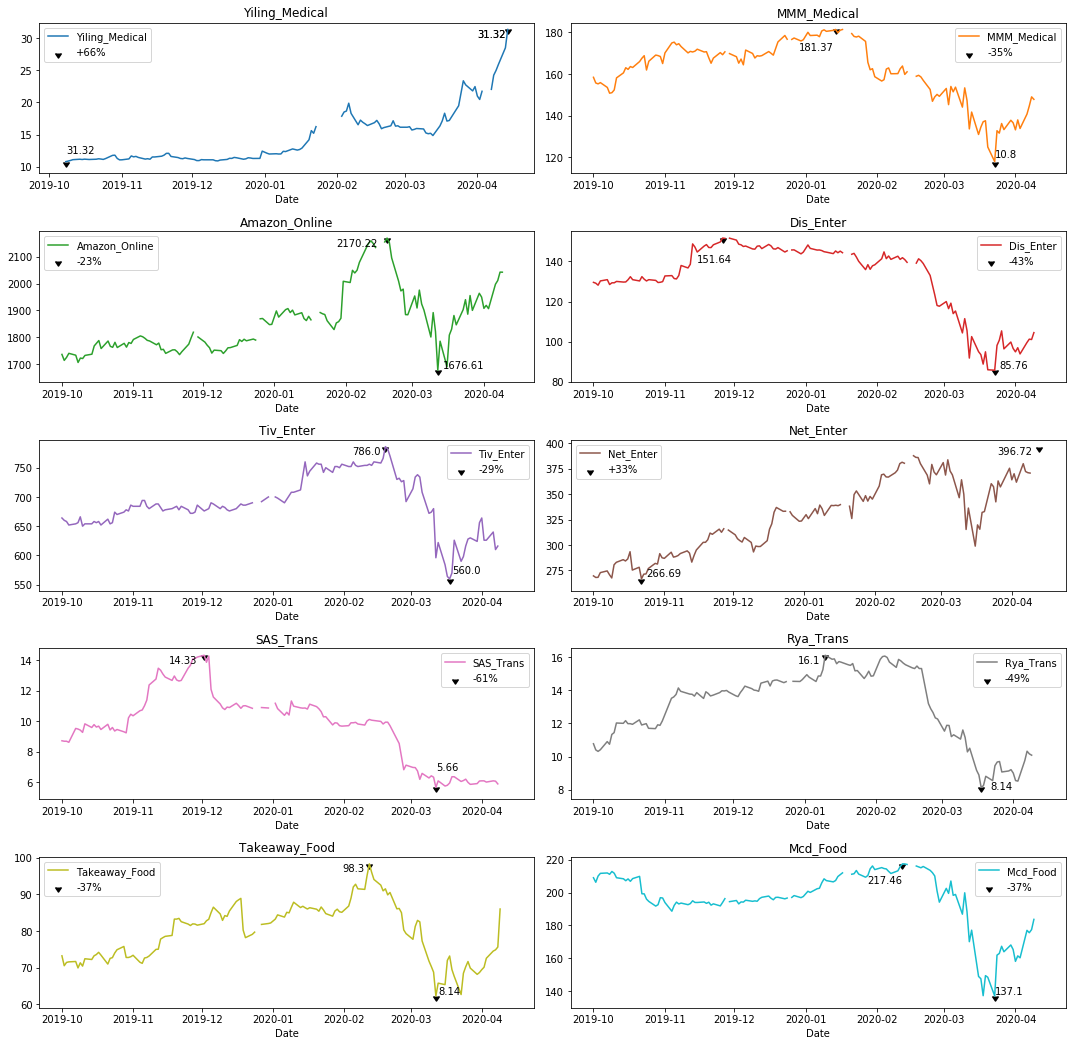

In [12]:
axes = Company.plot(subplots=True,sharex=False,layout=(7,2),figsize=(15,20),legend=False, title=["Yiling_Medical","MMM_Medical", "Amazon_Online","Dis_Enter","Tiv_Enter","Net_Enter","SAS_Trans","Rya_Trans","Takeaway_Food","Mcd_Food"]);

plt.subplot(721)
plt.scatter('2020-04-14',31.32,marker=11,color='Black',label="+66%");
plt.annotate('31.32', xy=('2020-04-14',31.32),xytext=('2020-04-13',31.32),ha='right', va='top');
plt.annotate('31.32', xy=('2020-04-14',31.32),xytext=('2020-04-13',31.32),ha='right', va='top',);
plt.scatter('2019-10-08',10.8,marker=11,color='Black');
plt.annotate('31.32', xy=('2019-10-08',10.8),xytext=('2019-10-08',11.8),ha='left', va='bottom');
plt.legend()

plt.subplot(722)
plt.scatter('2020-01-14',181.37,marker=11,color='Black',label="-35%");
plt.annotate('181.37', xy=('2020-01-14',181.37),xytext=('2020-01-13',175.37),ha='right', va='top');
plt.scatter('2020-03-23',117.87,marker=11,color='Black');
plt.annotate('10.8', xy=('2020-03-23',117.87),xytext=('2020-03-23',118.87),ha='left', va='bottom');
plt.legend()

plt.subplot(723)
plt.scatter('2020-02-19',2170.22,marker=11,color='Black',label="-23%");
plt.annotate('2170.22', xy=('2020-02-19',2170.22),xytext=('2020-02-15',2170.22),ha='right', va='top');
plt.scatter('2020-03-12',1676.61,marker=11,color='Black');
plt.annotate('1676.61', xy=('2020-03-12',1676.61),xytext=('2020-03-14',1676.61),ha='left', va='bottom');
plt.legend()

plt.subplot(724)
plt.scatter('2019-11-26',151.64,marker=11,color='Black',label="-43%");
plt.annotate('151.64', xy=('2019-11-26',151.64),xytext=('2019-11-30',143.64),ha='right', va='top');
plt.scatter('2020-03-23',85.76,marker=11,color='Black');
plt.annotate('85.76', xy=('2020-03-23',85.76),xytext=('2020-03-25',85.76),ha='left', va='bottom');
plt.legend()

plt.subplot(725)
plt.scatter('2020-02-19',786.0,marker=11,color='Black',label="-29%");
plt.annotate('786.0', xy=('2020-02-19',786.0),xytext=('2020-02-17',786.0),ha='right', va='top');
plt.scatter('2020-03-18',560.0,marker=11,color='Black');
plt.annotate('560.0', xy=('2020-03-18',560.0),xytext=('2020-03-19',565.0),ha='left', va='bottom');
plt.legend()

plt.subplot(726)
plt.scatter('2020-04-13',396.72,marker=11,color='Black',label="+33%");
plt.annotate('396.72', xy=('2020-04-13',396.72),xytext=('2020-04-10',396.72),ha='right', va='top');
plt.scatter('2019-10-22',266.69,marker=11,color='Black');
plt.annotate('266.69', xy=('2019-10-22',266.69),xytext=('2019-10-24',266.69),ha='left', va='bottom');
plt.legend()

plt.subplot(727)
plt.scatter('2019-12-02',14.33,marker=11,color='Black',label="-61%");
plt.annotate('14.33', xy=('2019-12-02',14.33),xytext=('2019-11-29',14.33),ha='right', va='top');
plt.scatter('2020-03-12',5.66,marker=11,color='Black');
plt.annotate('5.66', xy=('2020-03-12',5.66),xytext=('2020-03-12',6.66),ha='left', va='bottom');
plt.legend()

plt.subplot(728)
plt.scatter('2020-01-10',16.1,marker=11,color='Black',label="-49%");
plt.annotate('16.1', xy=('2020-01-10',16.1),xytext=('2020-01-08',16.1),ha='right', va='top');
plt.scatter('2020-03-18',8.14,marker=11,color='Black');
plt.annotate('8.14', xy=('2020-03-18',8.14),xytext=('2020-03-22',7.90),ha='left', va='bottom');
plt.legend()


plt.subplot(729)
plt.scatter('2020-02-12',98.3,marker=11,color='Black',label="-37%");
plt.annotate('98.3', xy=('2020-02-12',98.3),xytext=('2020-02-10',98.3),ha='right', va='top');
plt.scatter('2020-03-12',62.3,marker=11,color='Black');
plt.annotate('8.14', xy=('2020-03-12',62.3),xytext=('2020-03-13',62.3),ha='left', va='bottom');
plt.legend()

plt.subplot(7,2,10)
plt.scatter('2020-02-12',217.46,marker=11,color='Black',label="-37%");
plt.annotate('217.46', xy=('2020-02-12',217.46),xytext=('2020-02-12',210.46),ha='right', va='top');
plt.scatter('2020-03-23',137.1,marker=11,color='Black');
plt.annotate('137.1', xy=('2020-03-23',137.1),xytext=('2020-03-23',137.1),ha='left', va='bottom');
plt.legend()

#for ax in axes.flat:   
    #ax.scatter('2020-04-08',list[ax])
plt.tight_layout();
plt.show();

### Analysis the pattern for stock price

We could see from the above pictures, the main patterns can be catrgoried in 3 differnt group. Some was keep droping, some bounced back suddenly when hit the loweest point while some are keeping increasing. And we also would give analysis for the reason behind them:

Group 1: Yiling. This is a Chinese pulic company whose main products are Traditional Chinese Herb Medicine. Because one of their product, Lianhua Qingwen,had been widely used in curing light novel coronavirus pneumonia like fever and cough in China and the result was proven to be effective. Therefore it drove the stock price up.

Group 2: SAS, Ryanair, Disney and Tivoli. Because of the strict lock down policy all of the world, the air company and the outdoor entertainment park suffered a lot.SAS hit the lowest level in his stock history. Although the other three seemed bounced back a little but they still fluctated in its lowest level as well.

Group 3: 3M, Amazon,Netflix, Takeaway and McDonald. This Group more or less "benefit" from the COVID-19 because of changed way of people's life. At the begging of COVID-19, like other companys, they couldn't avoid loss either because the increase of system risk kept rising in that time. But with more and more people starting staying at home, online food ordering business, online shopping business, pnline media benefited from this situation. Meanwhile, with the crazy demanding of PPE, the stock price of 3M was improved. Especially we should look at Amazon and Netflix, after temporary drop, their stock price even reached the highest level again. 

### Visulizing the pattern of accumulated changes of stocks (Since 01-01-2020)

Reload data and use Change% instead of price for this visulization.

In [224]:
Yiling=pd.read_csv("002603 Historical Data_Yiling pharmacy.csv")
Amazon=pd.read_csv("AMZN Historical Data_Amazon.csv")
Dis=pd.read_csv("DIS Historical Data_Disney.csv")
Mcd=pd.read_csv("MCD Historical Data_McDonald’s.csv")
MMM=pd.read_csv("MMM Historical Data_3M.csv")
Rya=pd.read_csv("RYA Historical Data_Ryanair.csv")
SAS=pd.read_csv("SAS Historical Data_SAS.csv")
Tiv=pd.read_csv("TIV Historical Data_Tivoli.csv")
Takeaway=pd.read_csv("TKWY Historical Data_Just eat take away.csv")
Net=pd.read_csv("NFLX Historical Data_Netflix.csv")

Yiling['Date']=pd.to_datetime(Yiling['Date'])
Amazon['Date']=pd.to_datetime(Amazon['Date'])
Dis['Date']=pd.to_datetime(Dis['Date'])
Mcd['Date']=pd.to_datetime(Mcd['Date'])
MMM['Date']=pd.to_datetime(MMM['Date'])
Rya['Date']=pd.to_datetime(Rya['Date'])
SAS['Date']=pd.to_datetime(SAS['Date'])
Tiv['Date']=pd.to_datetime(Tiv['Date'])
Yiling['Date']=pd.to_datetime(Yiling['Date'])
Takeaway['Date']=pd.to_datetime(Takeaway['Date'])
Net['Date']=pd.to_datetime(Net['Date'])

Yiling=Yiling[Yiling['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
MMM=MMM[MMM['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Amazon=Amazon[Amazon['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Dis=Dis[Dis['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Tiv=Tiv[Tiv['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Net=Net[Net['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
SAS=SAS[SAS['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Rya=Rya[Rya['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Takeaway=Takeaway[Takeaway['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)
Mcd=Mcd[Mcd['Date']> '01-01-2020'][["Date","Change %"]].reset_index(drop=True)

from functools import reduce
Company=reduce(lambda x,y: pd.merge(x,y, on='Date', how='outer'), [Yiling,MMM, Amazon,Dis,Tiv,Net,SAS,Rya,Takeaway,Mcd])
Company['Date']=pd.to_datetime(Company['Date'])
Company.columns=["Date","Yiling_Medical","MMM_Medical", "Amazon_Online","Dis_Enter","Tiv_Enter","Net_Enter","SAS_Trans","Rya_Trans","Takeaway_Food","Mcd_Food"]
Company=Company.set_index("Date").sort_values(by=['Date'],ascending=True)

# Company['Amazon_Online'] = Company['Amazon_Online'].str.replace(",","")
# Company['Amazon_Online']=Company['Amazon_Online'].astype(float)


We change every column into a cumsum format and investigate into how much drop/increase of the stock price accumulated day by day since 01-01-2020 under the effect of COVID-19.

In [225]:
for c in range(len(Company.columns)):
    Company.iloc[:,c]=Company.iloc[:,c].str.strip('%')         

In [226]:
Company['Yiling_Medical']=Company['Yiling_Medical'].astype(float)
Company['MMM_Medical']=Company['MMM_Medical'].astype(float)
Company['Amazon_Online']=Company['Amazon_Online'].astype(float)
Company['Dis_Enter']=Company['Dis_Enter'].astype(float)
Company['Tiv_Enter']=Company['Tiv_Enter'].astype(float)
Company['Net_Enter']=Company['Net_Enter'].astype(float)
Company['SAS_Trans']=Company['SAS_Trans'].astype(float)
Company['Rya_Trans']=Company['Rya_Trans'].astype(float)
Company['Takeaway_Food']=Company['Takeaway_Food'].astype(float)
Company['Mcd_Food']=Company['Mcd_Food'].astype(float)

In [227]:
Company_accu=Company_accu.fillna(0)
Company_accu=Company.cumsum()
Company_accu=Company_accu.round(2)

In [ ]:
pip install pyecharts==0.5.11       #please run it#

In [159]:
from pyecharts import Line

In [288]:
x = Company_accu.index
#y=Company_accu.iloc[:,0]
line = Line(width = 800,height = 450)
for i in range(len(Company_accu.columns)):

    line.add(name=Company_accu.columns[i], x_axis = x, y_axis = Company_accu.iloc[:,i],
         
             line_width = 2,
             line_opacity = 0.5, 
         
    
             mark_point = ['min','max'], 
             #mark_line = ['average'],
             is_datazoom_show =True,
             is_smooth=True,
             is_fill=True,
             #legend_pos='95%',
             #legend_top='1%',
             #legend_orient='horizontal'
            )
line.render()
line

**Notes** for above interactive visulization:

1)If the plot doesn't show , please click on the third button "data review"on the rigt, then you could see data source, then please click on the "right red button 刷新" at the bottom, then the plot should show up.

2)If you only want to see only one or several lines but not all of them, you could click on legend labels on the top and shade which you don't want.

3)By using the Zoom bar at the bottom, you could select the period you want to focus on.

**Conclusion:**

From the above visulization, it shows clearly 4 companys benefit from COVID-19, because their accumulated changes are positive while others are are nagative. They are Yiling, Netflix, Amazon and Takeaway. Yiling_Medicine is the one benefit most from COVID-19, during the past 4 month, its stock price doubled. The accumulated increase for Netflix, Amazon and Takeaway are 24.93%,18.86% and 9.05%.

In terms of negative effect by COVID-19, airlines seem suffered most.There were accumulated drop of 64.23% and 29.92% seperately for SAS and Ryan airline. Entertainment was the second most suffered industry. Disney lost 27.23% in total and Tivoli lost 9.54%.
The performacne of food industry varied based on their categories, for example, takeaway business trived but restaurant like McDoload was affated. But maybe because most McDoload restaurants have their own take-away service, therefore they didn't suffered a lot by COVID-19 with a little drop of 2.91%.  
    